# Before we start the t-test we should do some exploratory data analysis to create some hypothesis. 

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Let us load in our min/max adjusted data

In [3]:
data = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 
#data = pd.read_excel (r'preprocess_securites.xlsx', sheet_name='HY')

In [4]:
#data.head()
data.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1999-01-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.061413,0.0000,0.742285,0.734467,0.911793,0.896788,0.754677,0.726411,1.000000,0.981686,0.786902,0.725754,0.739139,0.398443,3.0
1,1999-02-28 00:00:00,1.00000,#VALUE!,#VALUE!,0.822168,0.8923,1.000000,1.000000,1.000000,1.000000,0.977482,0.950245,1.000000,1.000000,0.917165,0.888962,0.853224,0.502272,3.0
2,1999-03-31 00:00:00,1.00000,#VALUE!,#VALUE!,1.000000,1.0000,0.887461,0.894749,0.846522,0.876495,0.966473,0.916707,1.000000,1.000000,0.818541,0.754026,0.815425,0.469207,3.0
3,1999-04-30 00:00:00,0.91866,#VALUE!,#VALUE!,1.000000,1.0000,0.756134,0.787182,0.649044,0.635819,0.917259,0.875811,0.969175,0.952241,0.682769,0.549867,0.734817,0.375368,3.0
4,1999-05-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.043678,0.0000,0.331229,0.325447,0.536516,0.486732,0.699631,0.662173,0.737502,0.687860,0.570753,0.362783,0.542768,0.190791,3.0


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

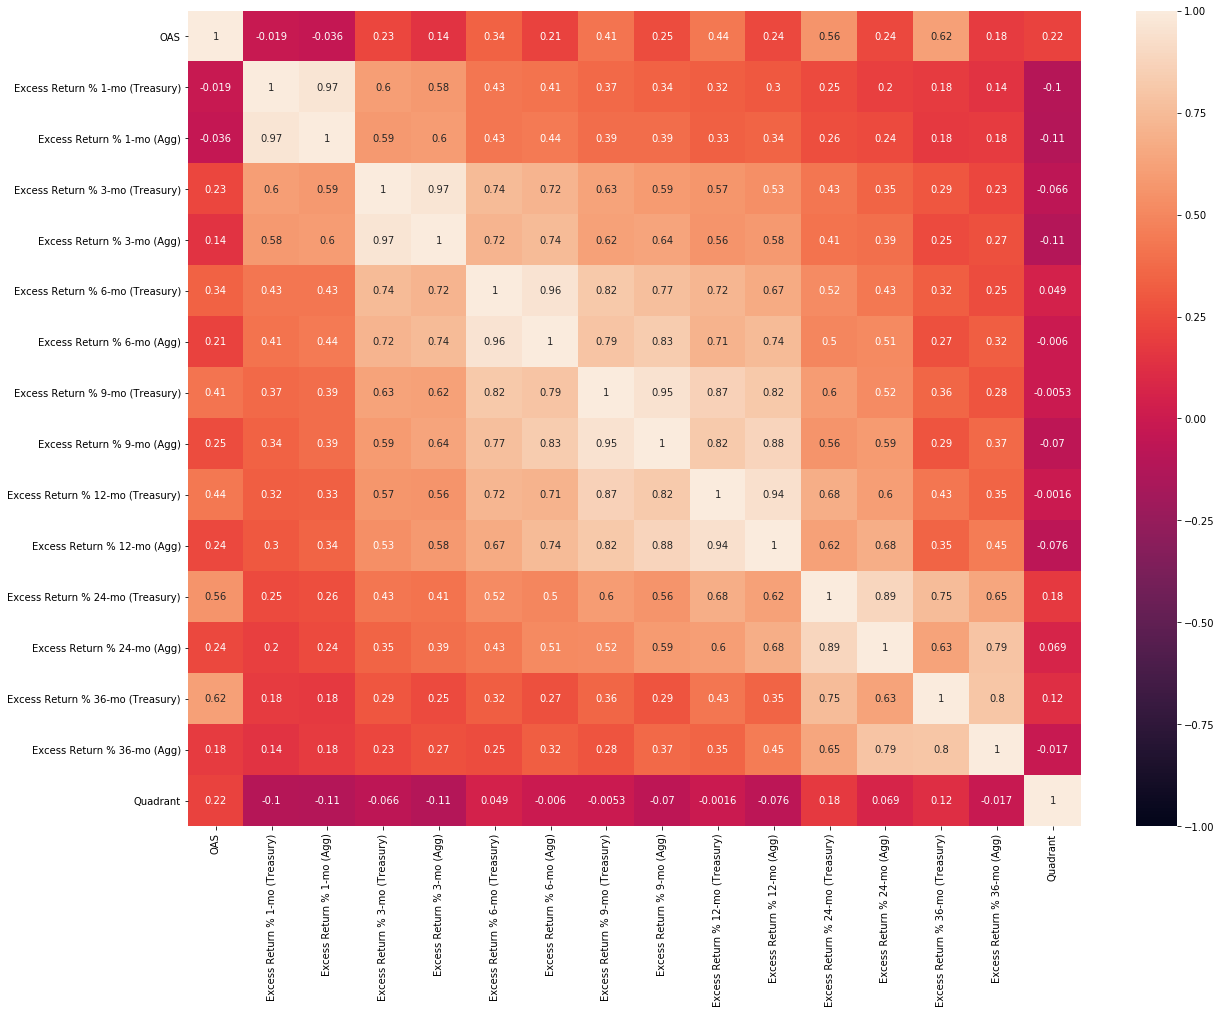

In [5]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(20, 15))
sns.heatmap(data[['OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)','Quadrant']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

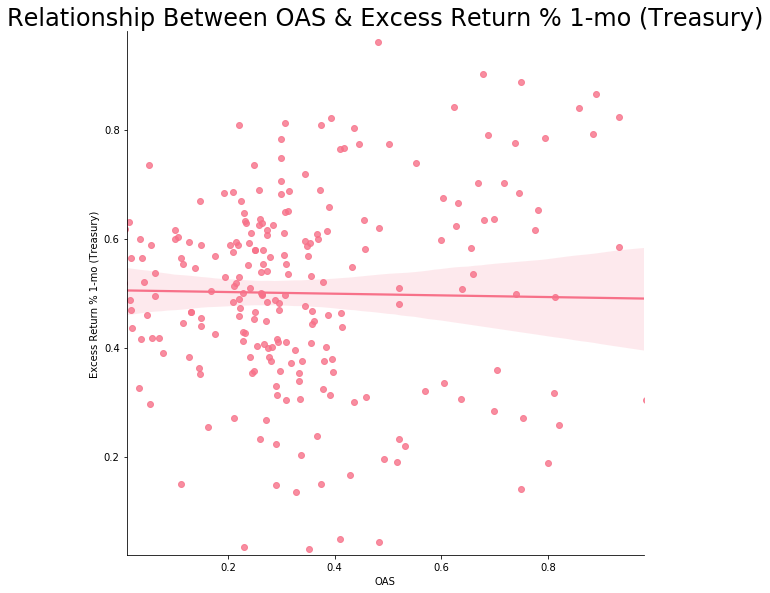

In [6]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

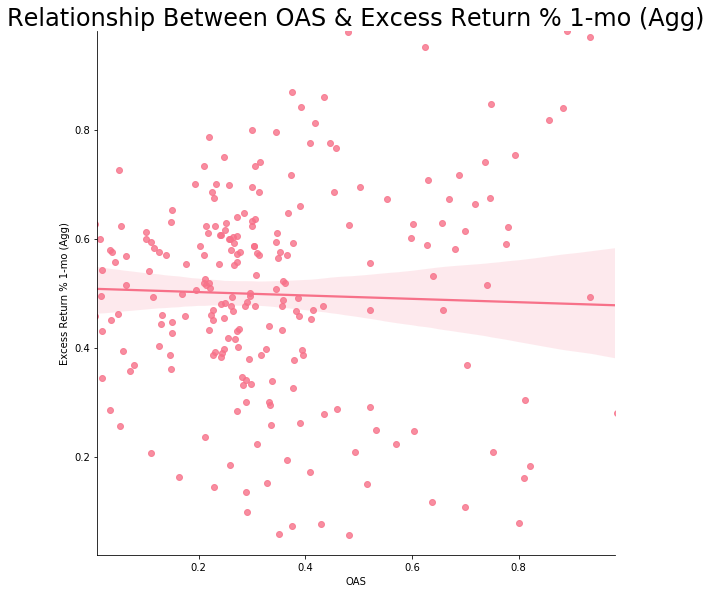

In [7]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

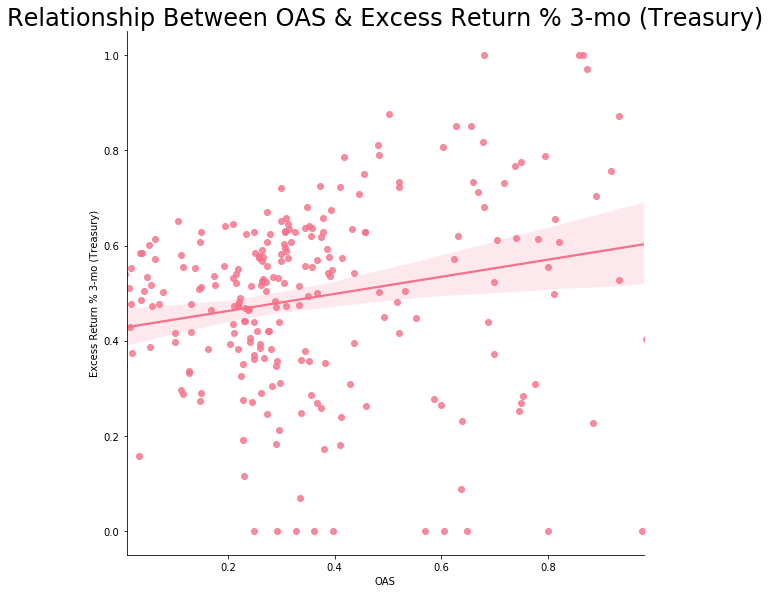

In [8]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

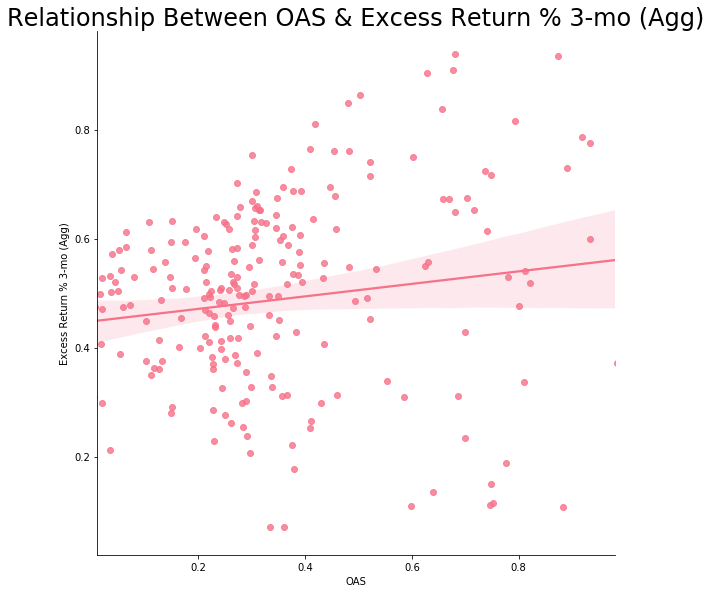

In [9]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

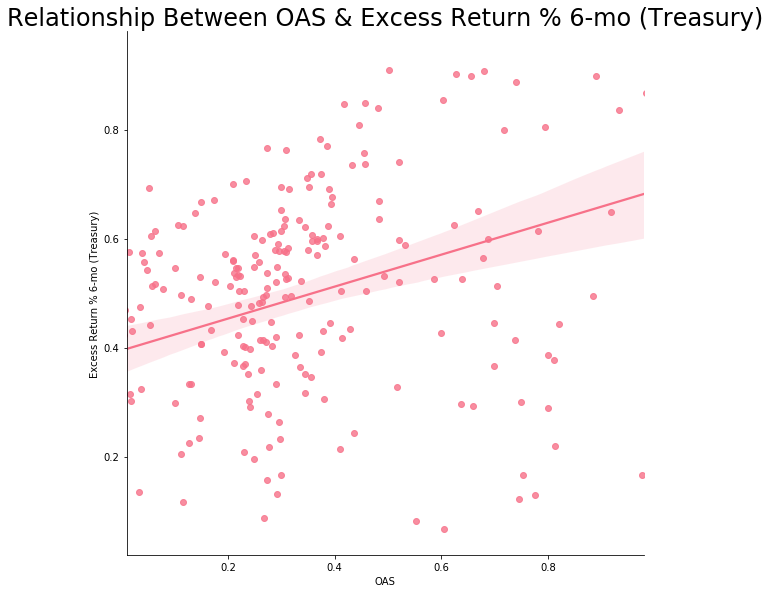

In [10]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

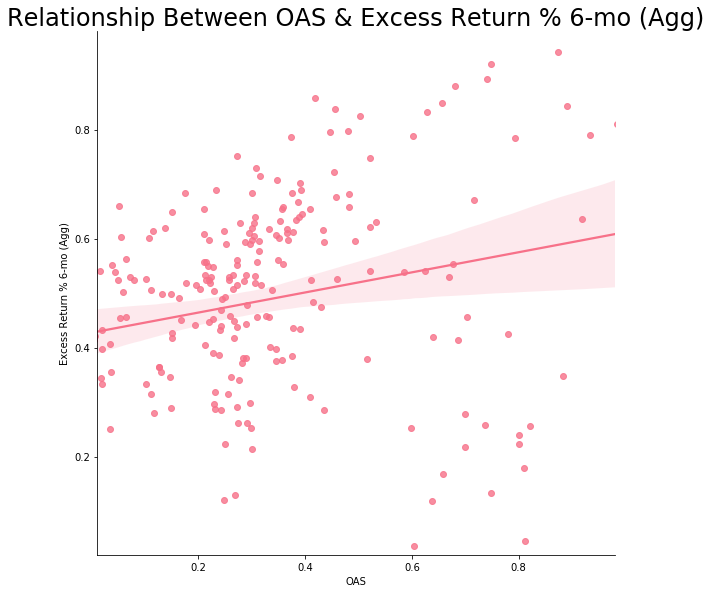

In [11]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

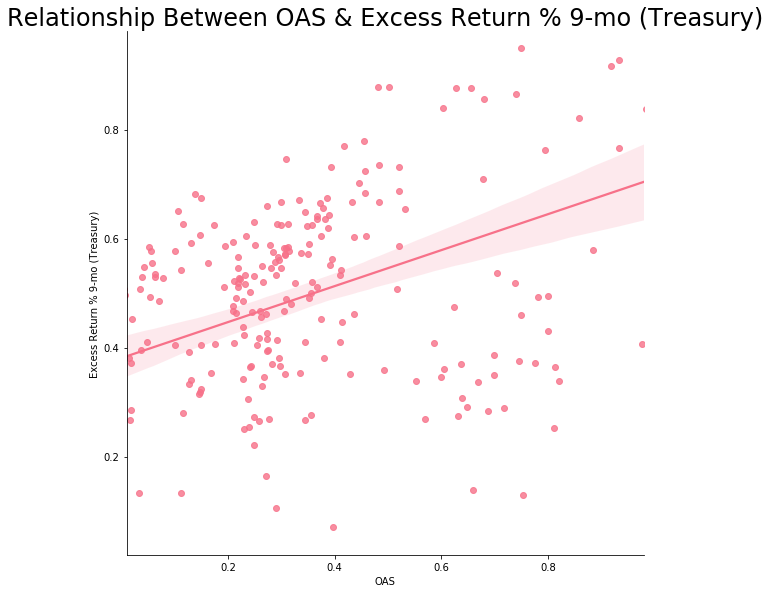

In [12]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

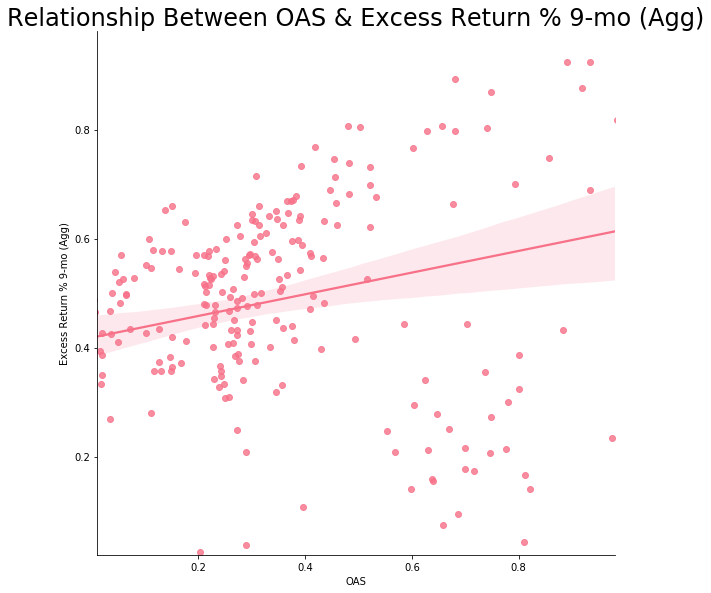

In [13]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

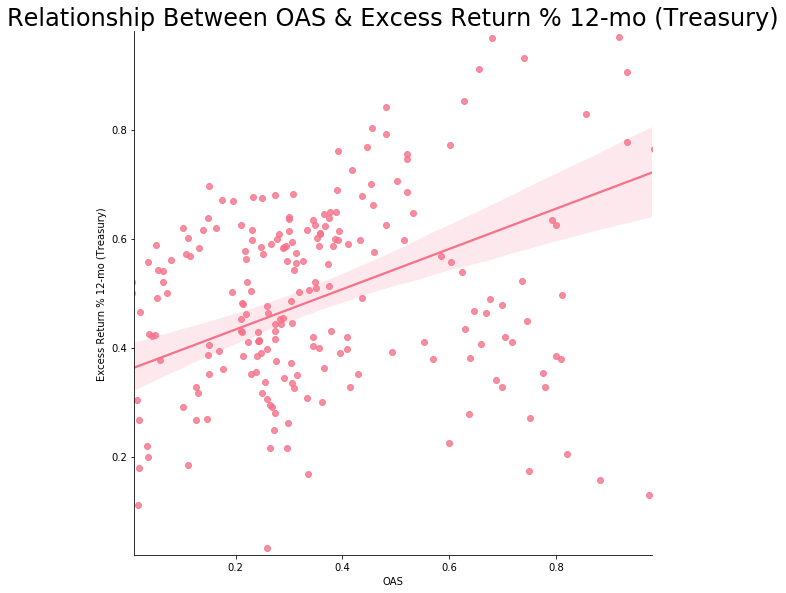

In [14]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

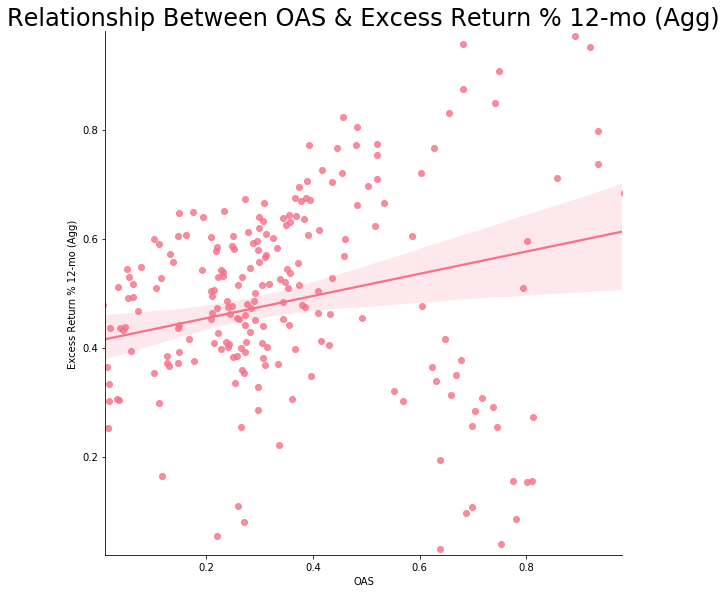

In [15]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

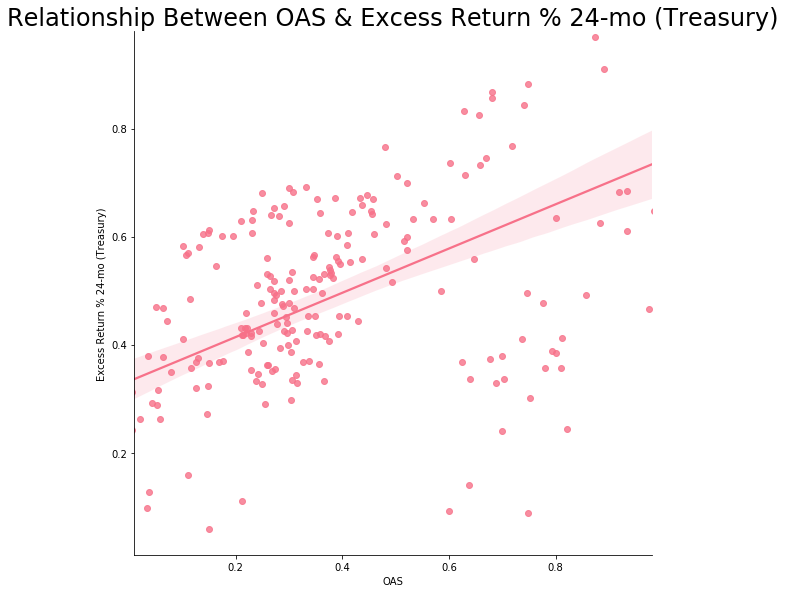

In [16]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.011)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

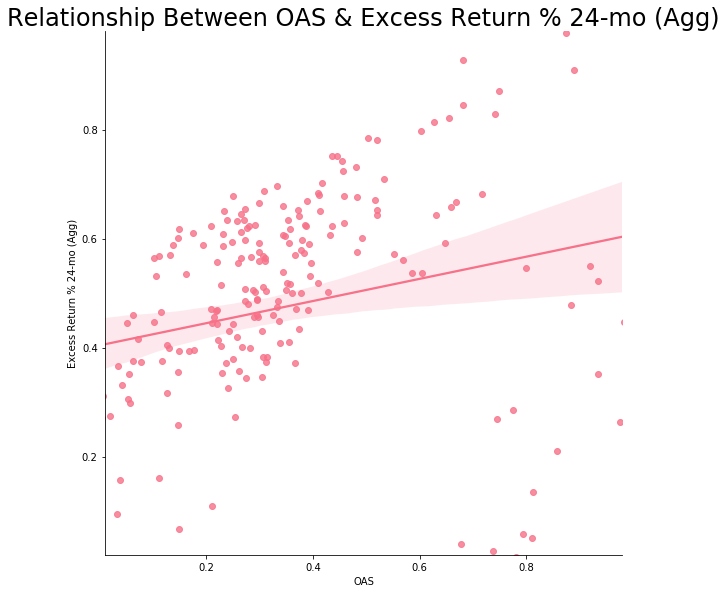

In [17]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

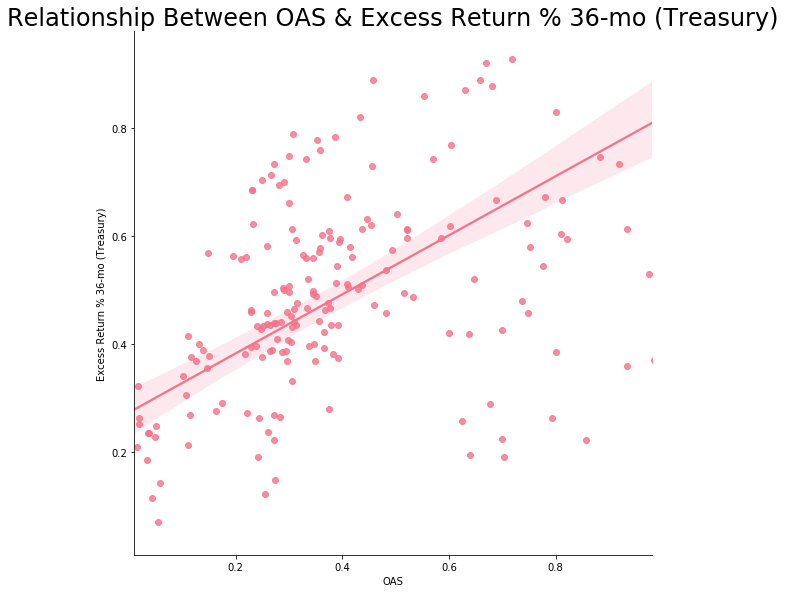

In [18]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Treasury)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.009)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

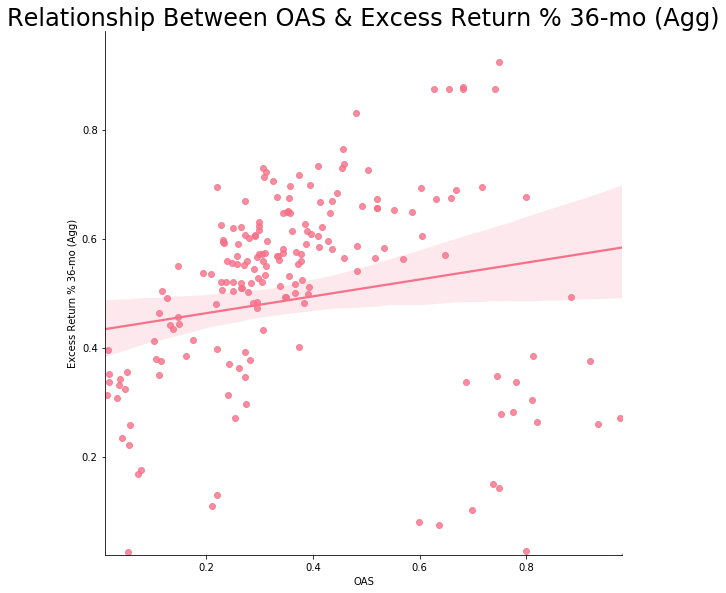

In [19]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Agg)', data = data, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

# Time to backtest with only 5ish years of data. Jan. 2015 to April 2020

In [20]:
data1 = data[data.Date >= '2015-01-31 00:00:00'] # data set for dates greater than a given time
data1.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
192,2015-01-31 00:00:00,0.492615,#VALUE!,#VALUE!,0.196196,0.208187,0.450379,0.484631,0.532035,0.595800,0.358871,0.415211,0.391516,0.454131,0.516096,0.600490,0.575006,0.660541,1.0
193,2015-02-28 00:00:00,0.409403,#VALUE!,#VALUE!,0.764388,0.774907,0.722645,0.763475,0.604051,0.653702,0.532430,0.572634,0.397837,0.463599,0.584576,0.683400,0.671966,0.733036,1.0
194,2015-03-31 00:00:00,0.414396,#VALUE!,#VALUE!,0.437958,0.468439,0.572753,0.636637,0.416736,0.483657,0.446388,0.494889,0.327293,0.412790,0.553080,0.651092,0.580264,0.666389,1.0
195,2015-04-30 00:00:00,0.344498,#VALUE!,#VALUE!,0.718049,0.795381,0.557292,0.619162,0.316911,0.374694,0.409625,0.451103,0.420261,0.483471,0.562193,0.659179,0.559286,0.646983,3.0
196,2015-05-31 00:00:00,0.344498,#VALUE!,#VALUE!,0.477088,0.507810,0.378089,0.420703,0.350910,0.396966,0.266702,0.319294,0.403713,0.452198,0.525475,0.606057,0.492113,0.580844,3.0


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

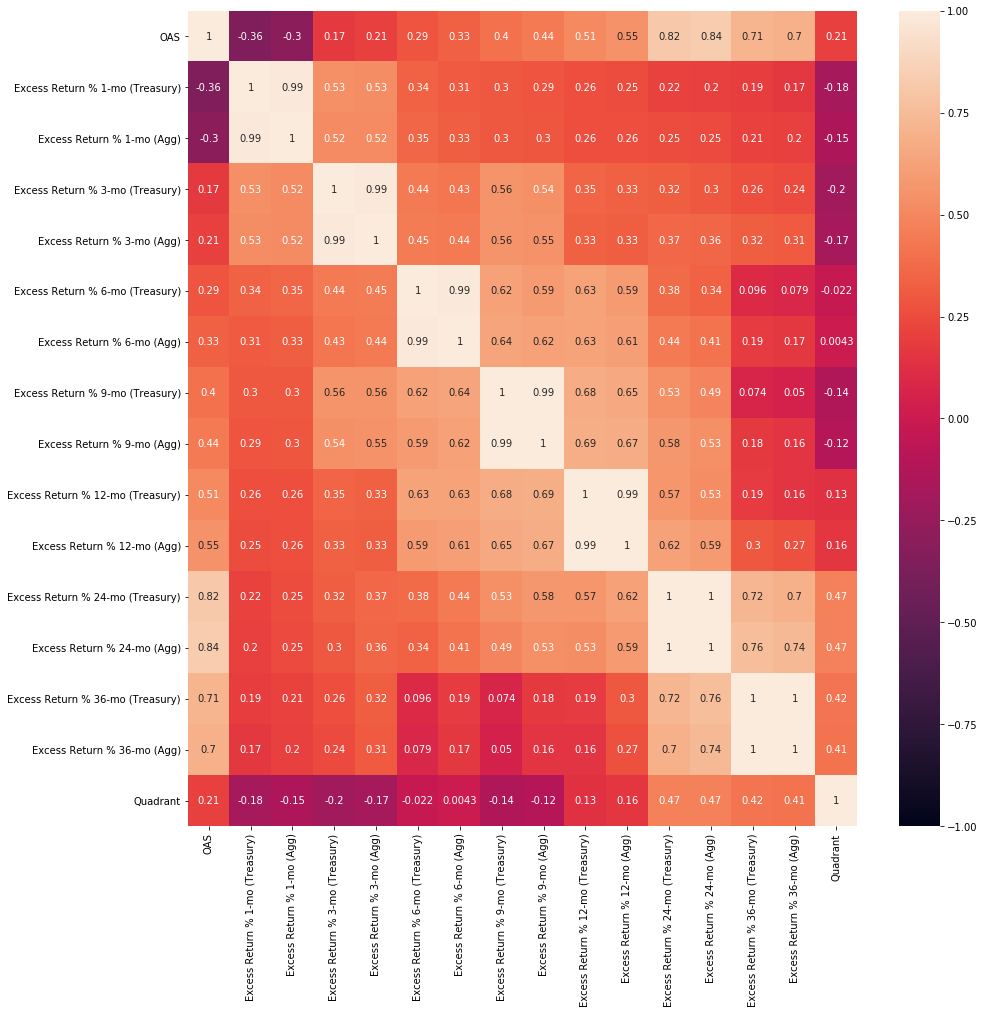

In [21]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(15, 15))
sns.heatmap(data1[['OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)','Quadrant']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 1-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

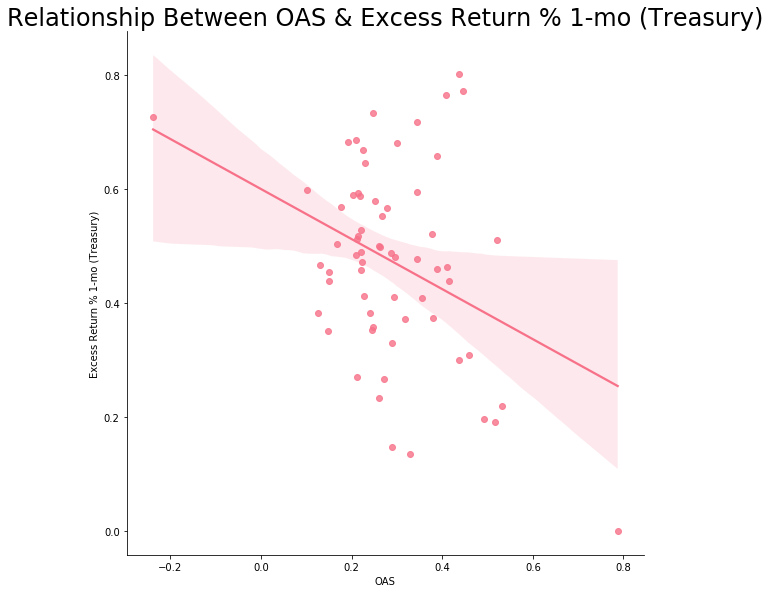

In [22]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 1-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

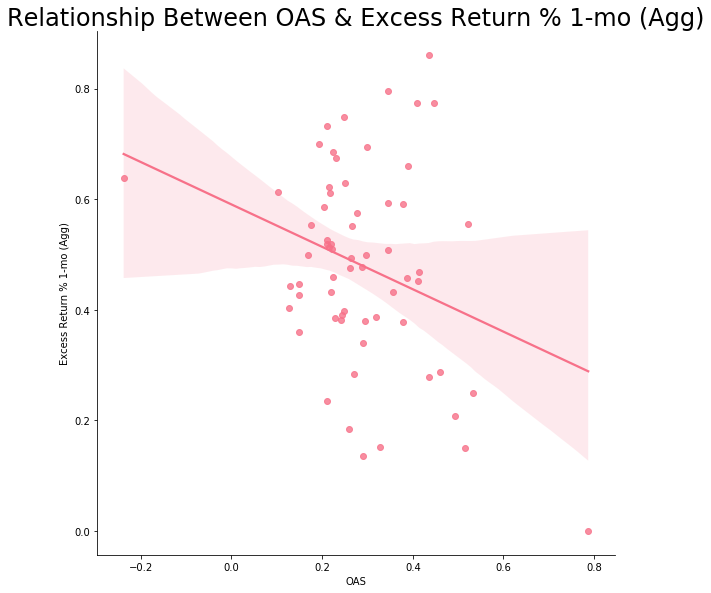

In [23]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 3-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

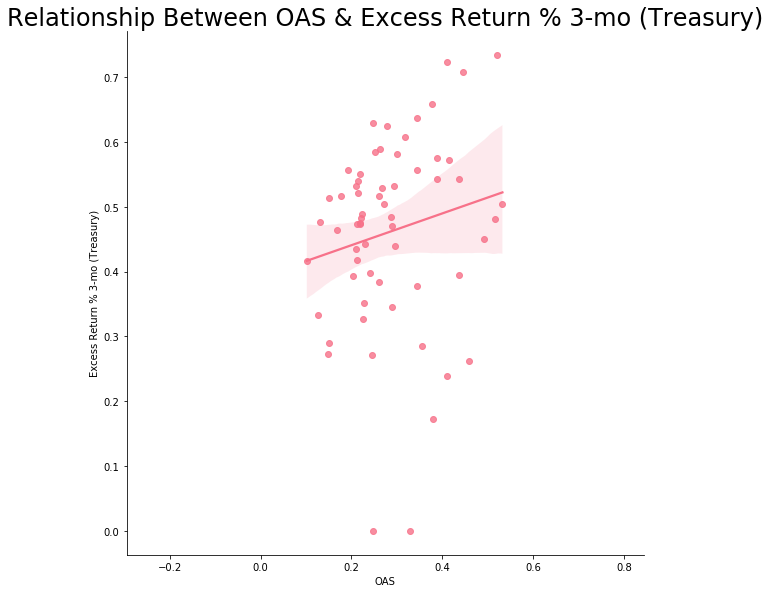

In [24]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 3-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

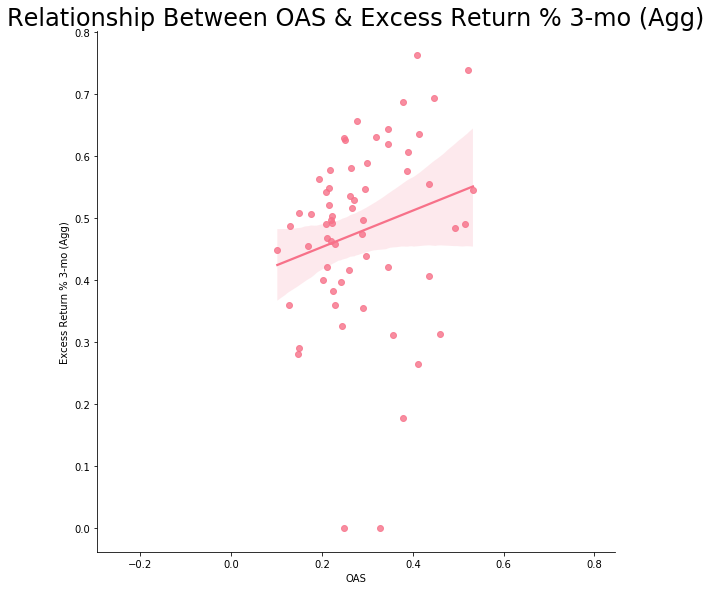

In [25]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 6-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

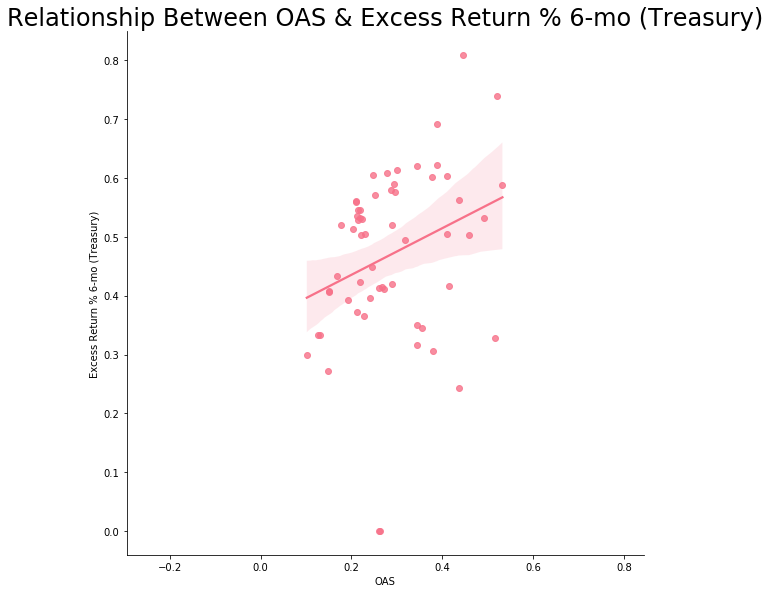

In [26]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 6-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

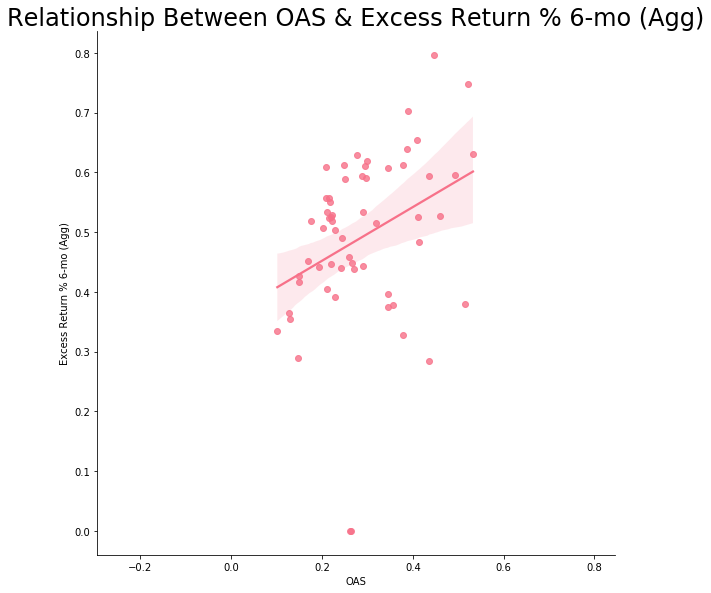

In [27]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 9-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

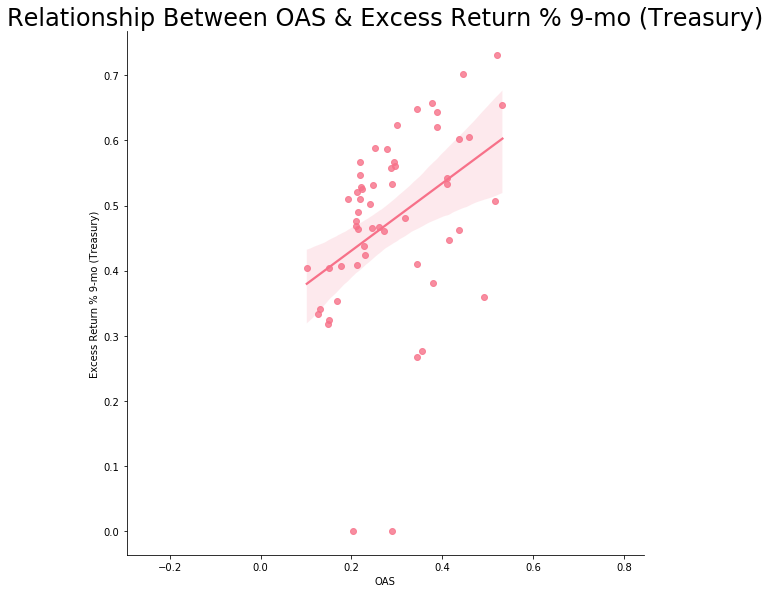

In [28]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 9-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

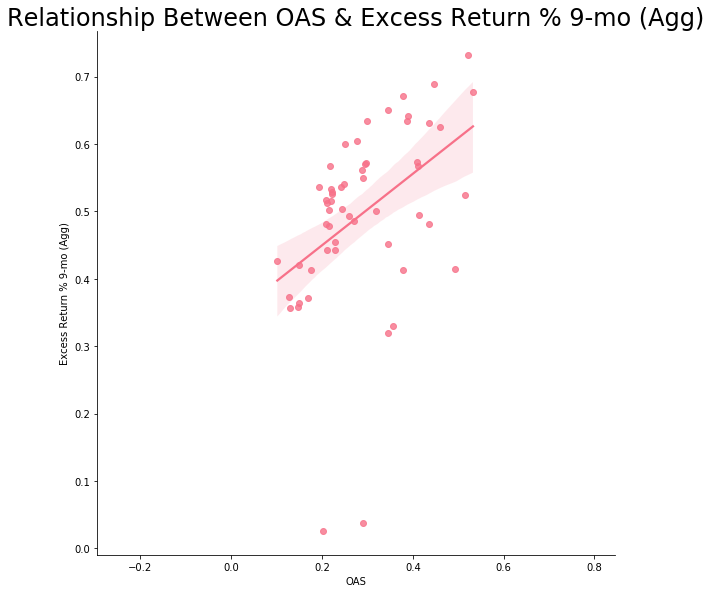

In [29]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 12-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

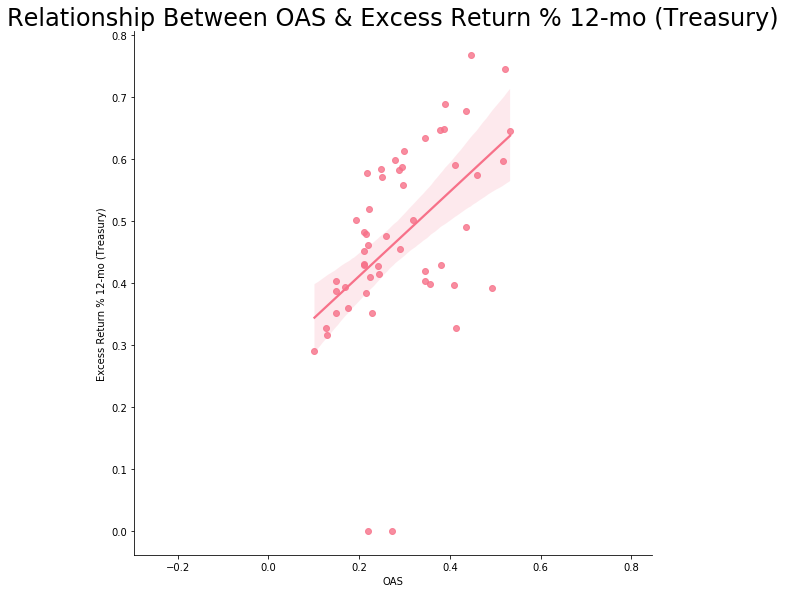

In [30]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 12-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

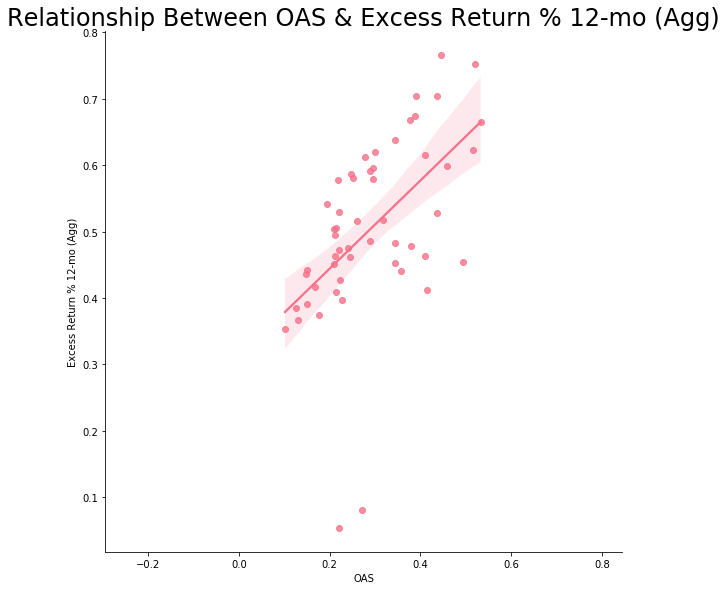

In [31]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 24-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

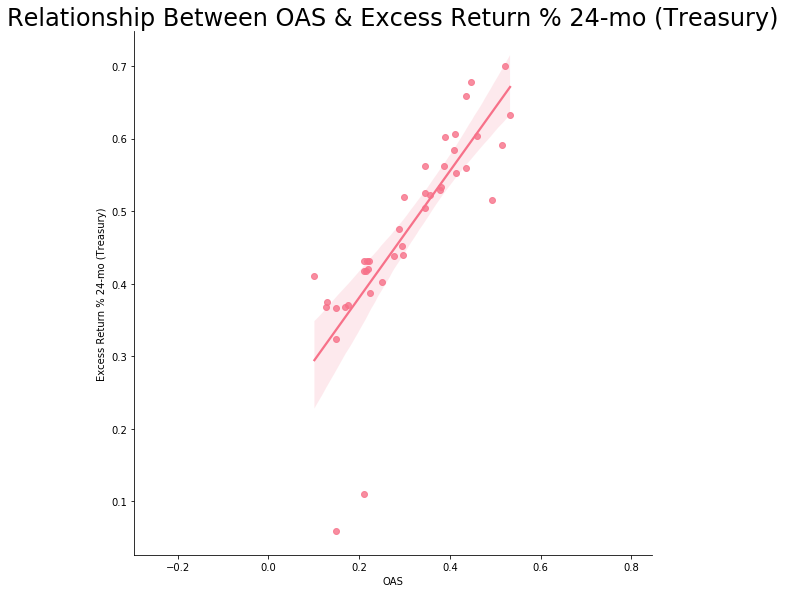

In [32]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.011)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 24-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

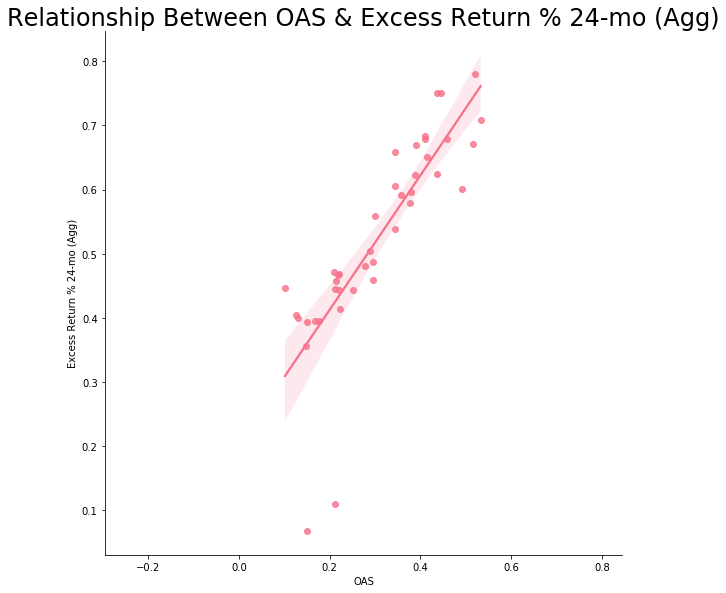

In [33]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

Text(0.5, 1, 'Relationship Between OAS & Excess Return % 36-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

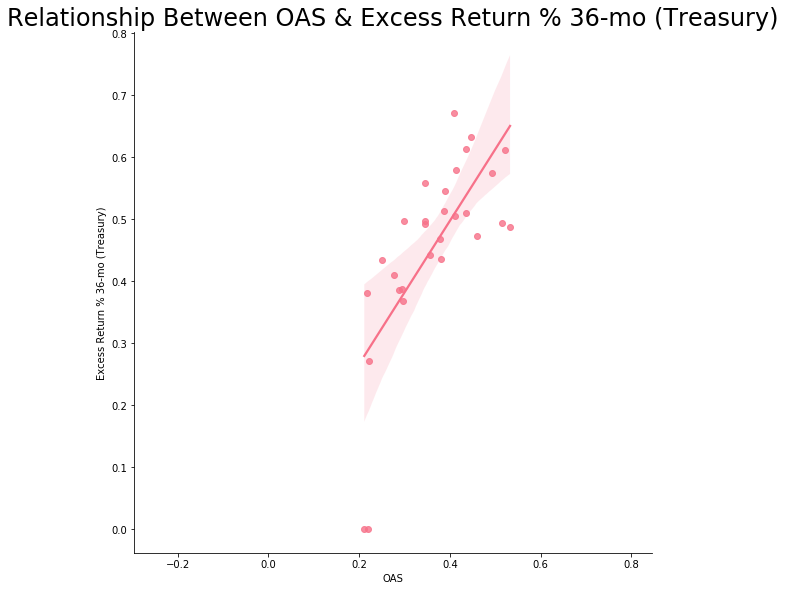

In [34]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Treasury)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.009)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 36-mo (Agg)')

<Figure size 1080x3240 with 0 Axes>

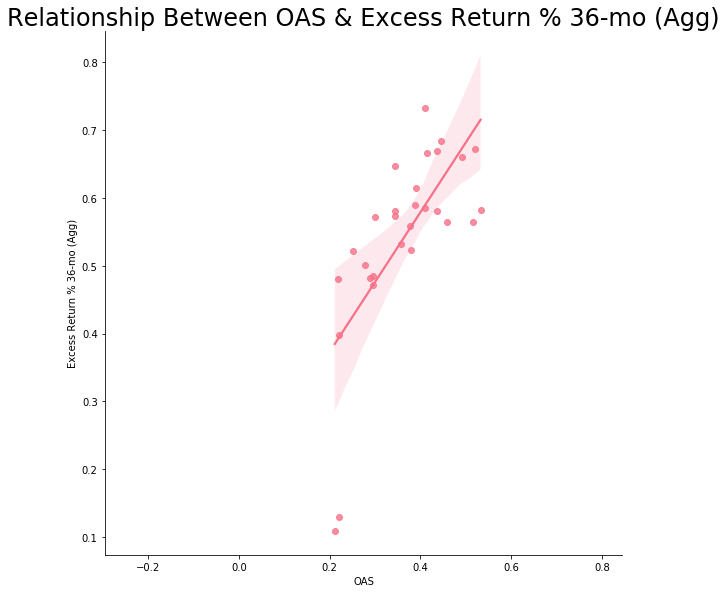

In [35]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Agg)', data = data1, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.02)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

# Time to backtest with only 10ish years of data. Jan. 2010 to April 2020

In [36]:
data2 = data[data.Date >= '2010-01-31 00:00:00'] # data set for dates greater than a given time
data2.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
132,2010-01-31 00:00:00,0.326191,#VALUE!,#VALUE!,0.395624,0.397629,0.628268,0.628020,0.385971,0.458195,0.518078,0.610807,0.558871,0.600696,0.367095,0.459534,0.565205,0.706420,2.0
133,2010-02-28 00:00:00,0.312877,#VALUE!,#VALUE!,0.535097,0.569171,0.645042,0.653006,0.527924,0.595313,0.584920,0.660236,0.573799,0.608302,0.407151,0.504228,0.592487,0.721296,2.0
134,2010-03-31 00:00:00,0.219680,#VALUE!,#VALUE!,0.808781,0.786683,0.381551,0.410405,0.477665,0.596602,0.518701,0.576681,0.563254,0.584772,0.458265,0.557764,0.560828,0.694131,2.0
135,2010-04-30 00:00:00,0.228001,#VALUE!,#VALUE!,0.427775,0.450247,0.190649,0.284738,0.403709,0.548641,0.484625,0.531498,0.503224,0.543063,0.422407,0.514893,0.462380,0.625000,1.0
136,2010-05-31 00:00:00,0.351155,#VALUE!,#VALUE!,0.030063,0.058298,0.357316,0.450111,0.484964,0.600703,0.490817,0.526753,0.510148,0.543861,0.417534,0.518136,0.489277,0.648084,1.0


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

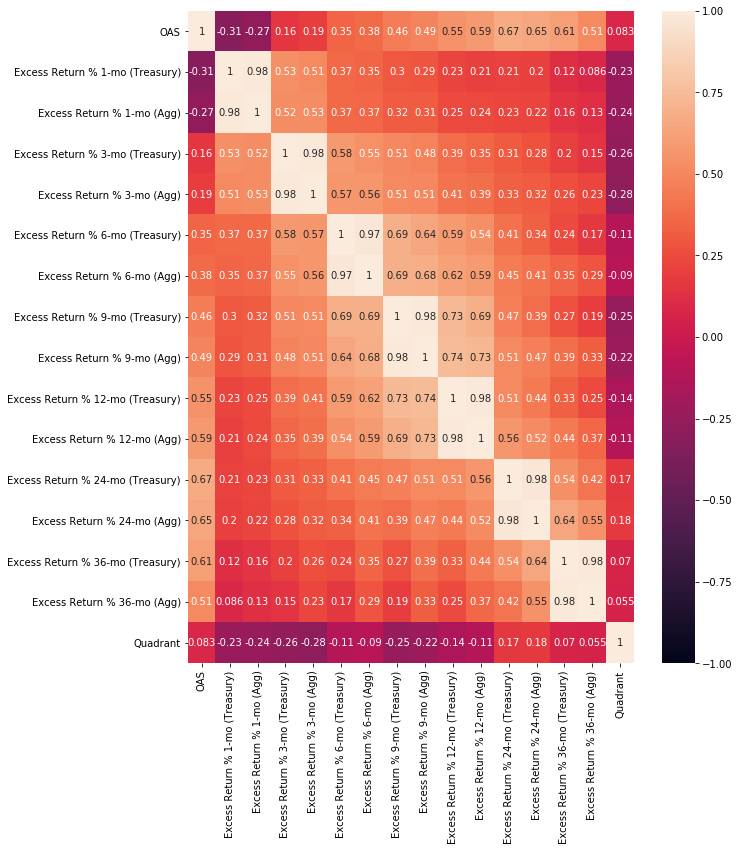

In [37]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(10, 12))
sns.heatmap(data2[['OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)','Quadrant']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

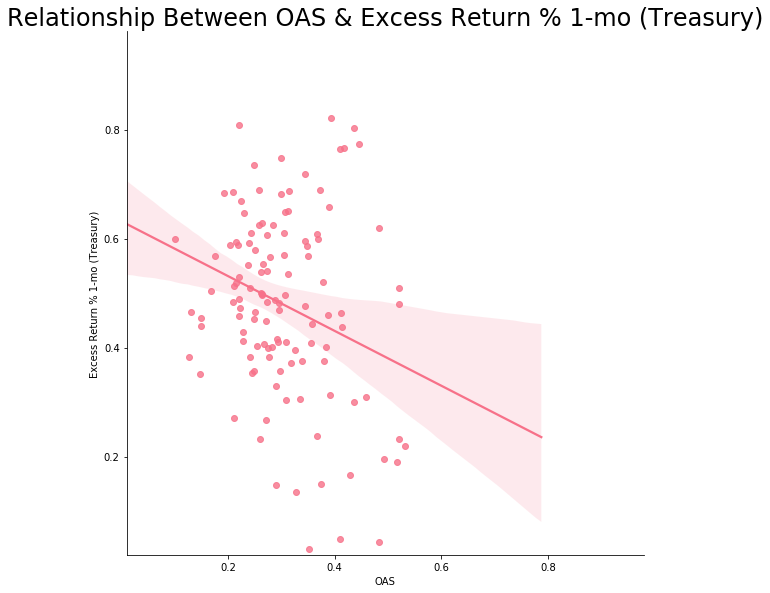

In [38]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

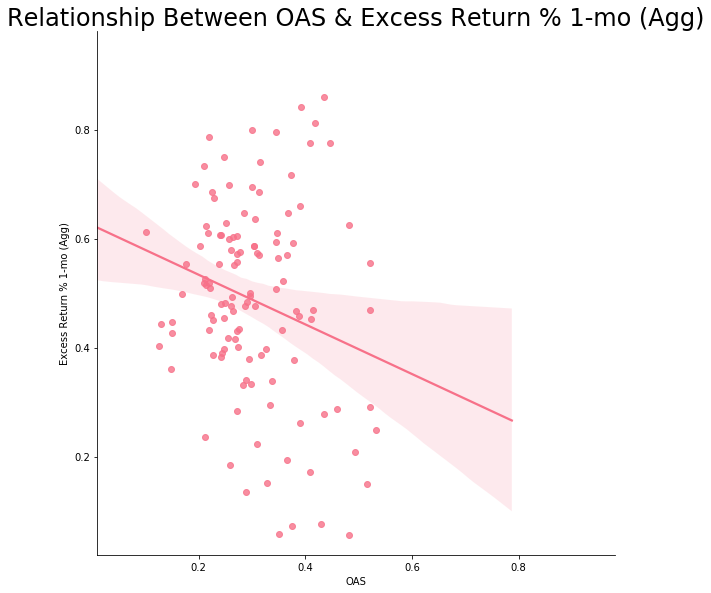

In [39]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

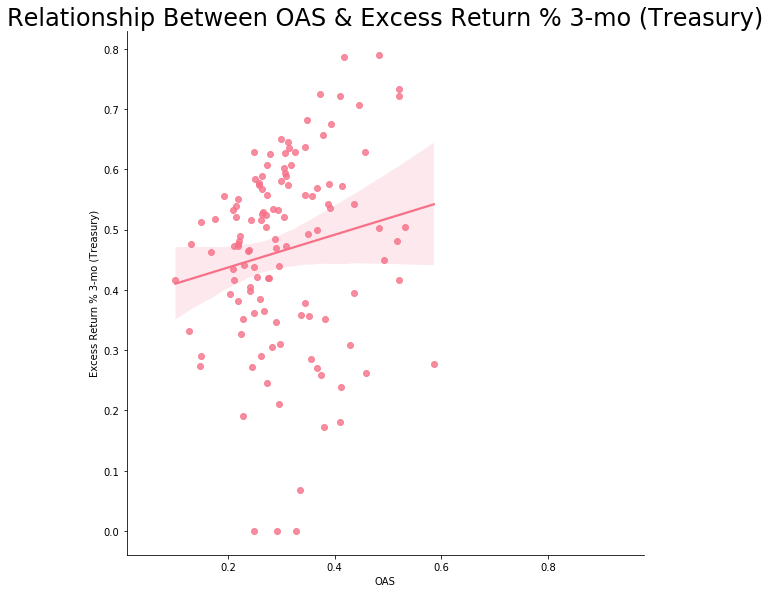

In [40]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

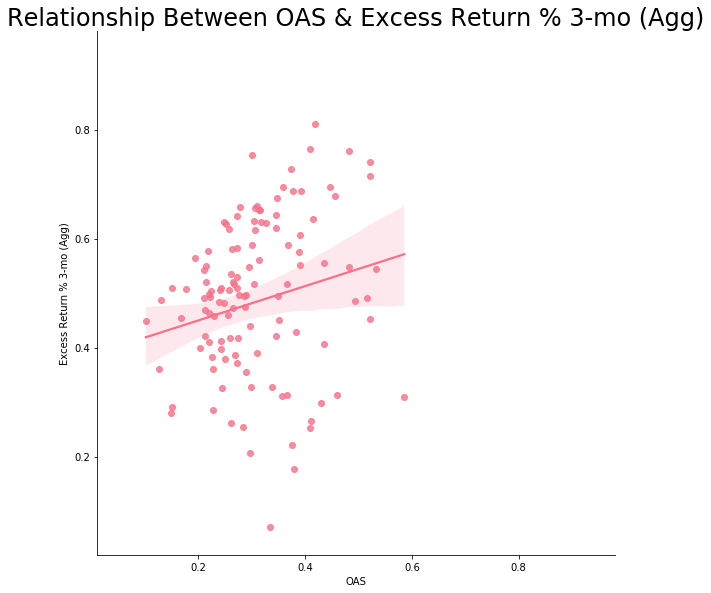

In [41]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

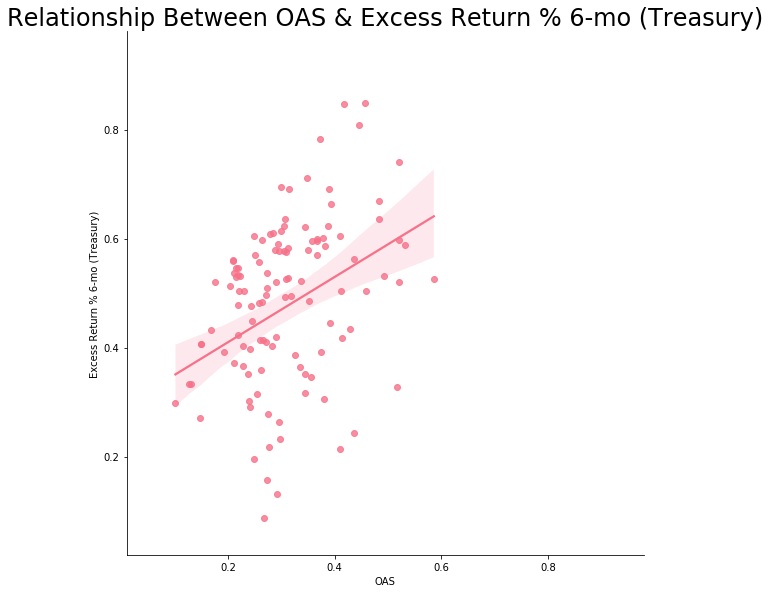

In [42]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

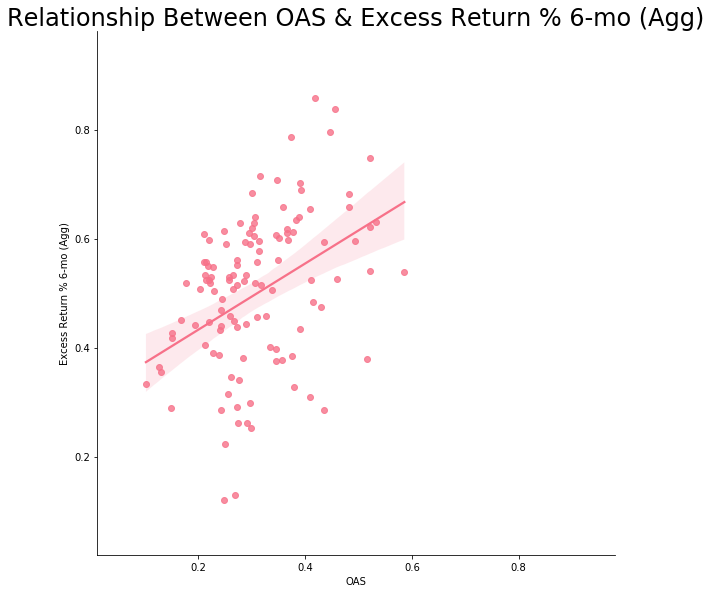

In [43]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

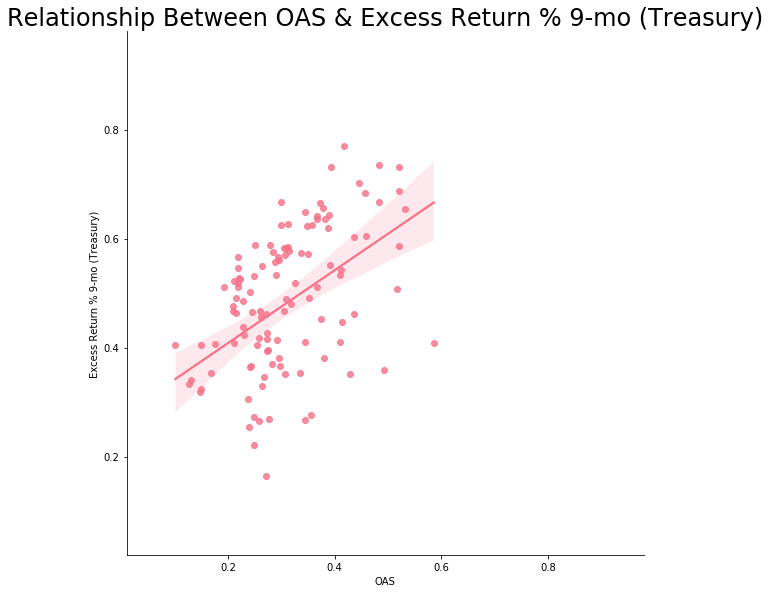

In [44]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

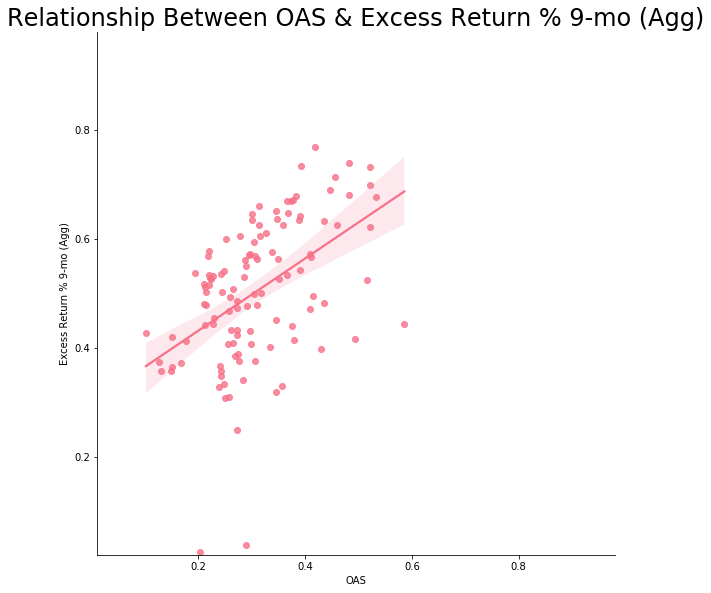

In [45]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

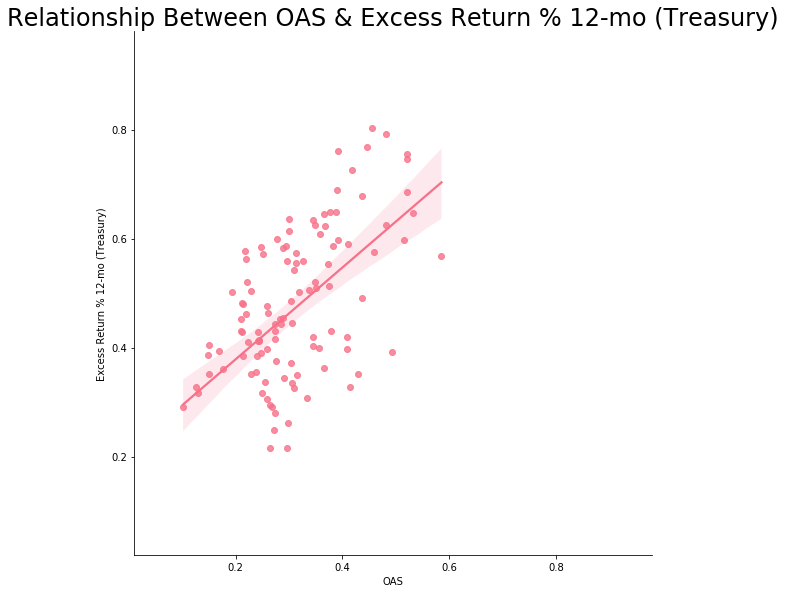

In [46]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

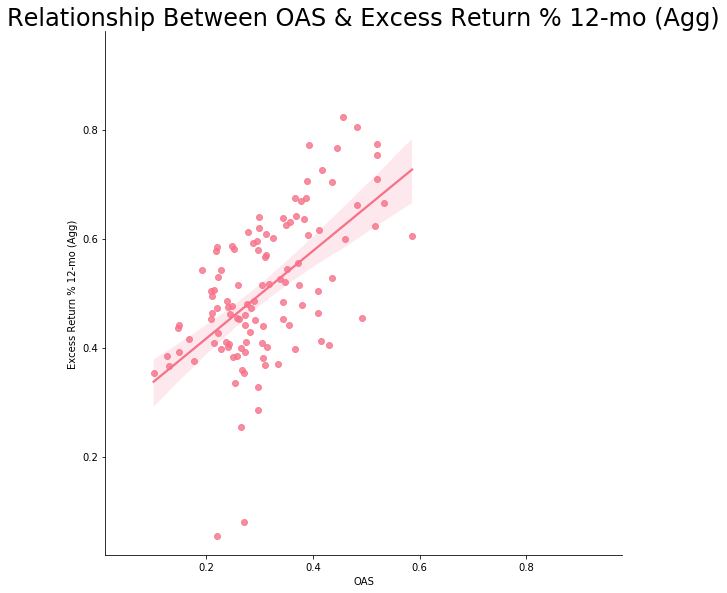

In [47]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


Text(0.5, 1, 'Relationship Between OAS & Excess Return % 24-mo (Treasury)')

<Figure size 1080x3240 with 0 Axes>

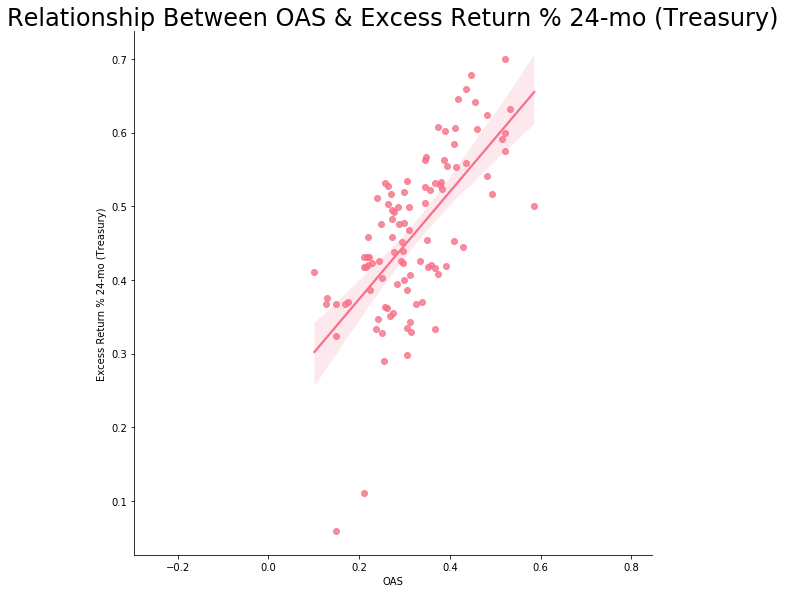

In [48]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Treasury)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)
#plt.ylim(top=0.98)
#plt.ylim(bottom=.011)
#plt.xlim(right=.98)
#plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

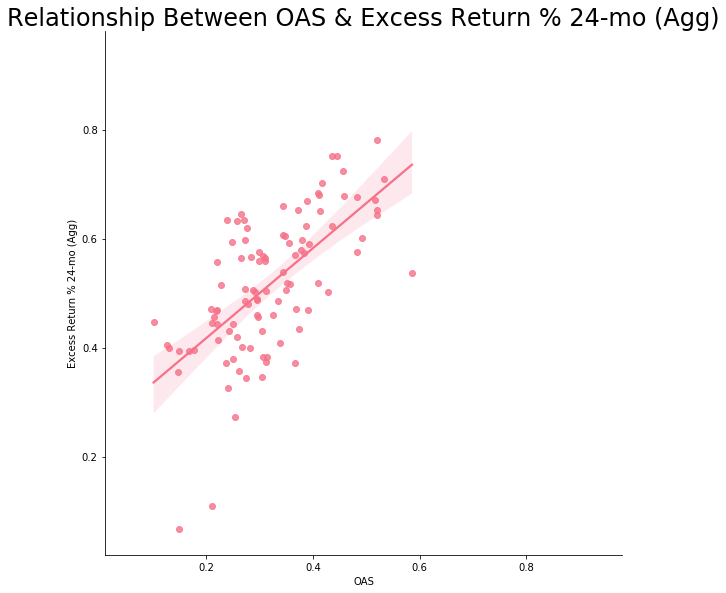

In [49]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x1080 with 0 Axes>

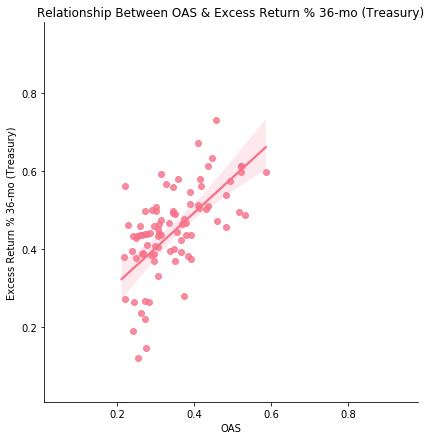

In [50]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 15)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Treasury)', data = data2, height=6, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=12)
plt.ylim(top=0.98)
plt.ylim(bottom=.009)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

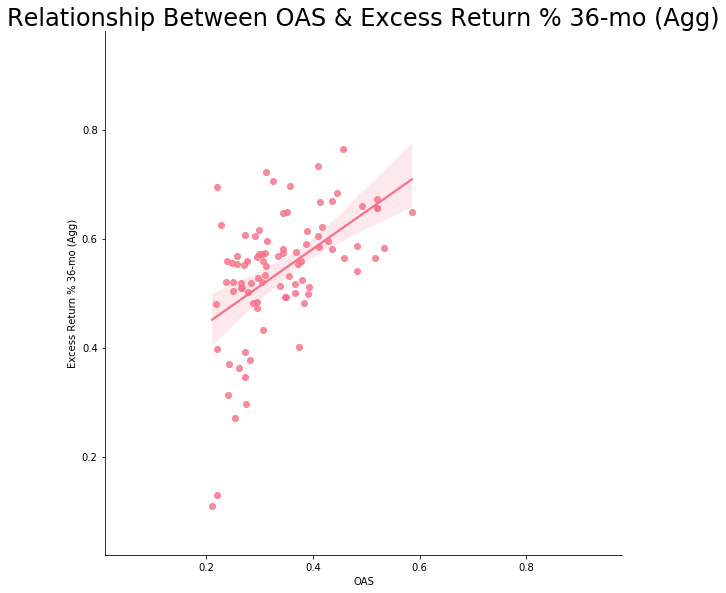

In [51]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Agg)', data = data2, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

# Time to backtest with only 15ish years of data. Jan. 2005 to April 2020

In [52]:
data3 = data[data.Date >= '2005-01-31 00:00:00'] # data set for dates greater than a given time
data3.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
72,2005-01-31 00:00:00,0.131475,#VALUE!,#VALUE!,0.465646,0.458991,0.417905,0.375027,0.489676,0.498423,0.591538,0.577021,0.582153,0.571650,0.581483,0.569945,0.399915,0.440813,1.0
73,2005-02-28 00:00:00,0.101519,#VALUE!,#VALUE!,0.615418,0.598527,0.397012,0.374991,0.545339,0.526521,0.577810,0.552382,0.619442,0.599541,0.582077,0.564267,0.341468,0.412273,1.0
74,2005-03-31 00:00:00,0.163095,#VALUE!,#VALUE!,0.255235,0.163211,0.383044,0.400283,0.476695,0.490671,0.555365,0.544821,0.619918,0.606103,0.546384,0.535065,0.275094,0.383947,1.0
75,2005-04-30 00:00:00,0.174745,#VALUE!,#VALUE!,0.425601,0.458914,0.535026,0.593580,0.670062,0.682989,0.624107,0.629695,0.670134,0.647865,0.601634,0.609700,0.291501,0.413236,4.0
76,2005-05-31 00:00:00,0.149782,#VALUE!,#VALUE!,0.588644,0.651787,0.627850,0.632623,0.666875,0.648092,0.674042,0.658880,0.695988,0.647607,0.612733,0.616801,0.377450,0.444205,4.0


# Lets see if our variables are correlated
### With correlation matrix 
# -------------------------------------------------------------------------------

# We can explore a lot with this above, but lets focus on OAS

### We see that the further we go out the more correlated the excess return is with OAS.
#### *It would be interesting to see how the correlation would change for 24M and 36M

# You can also see interesting patterns with the 3M to the 6M,9M,12M

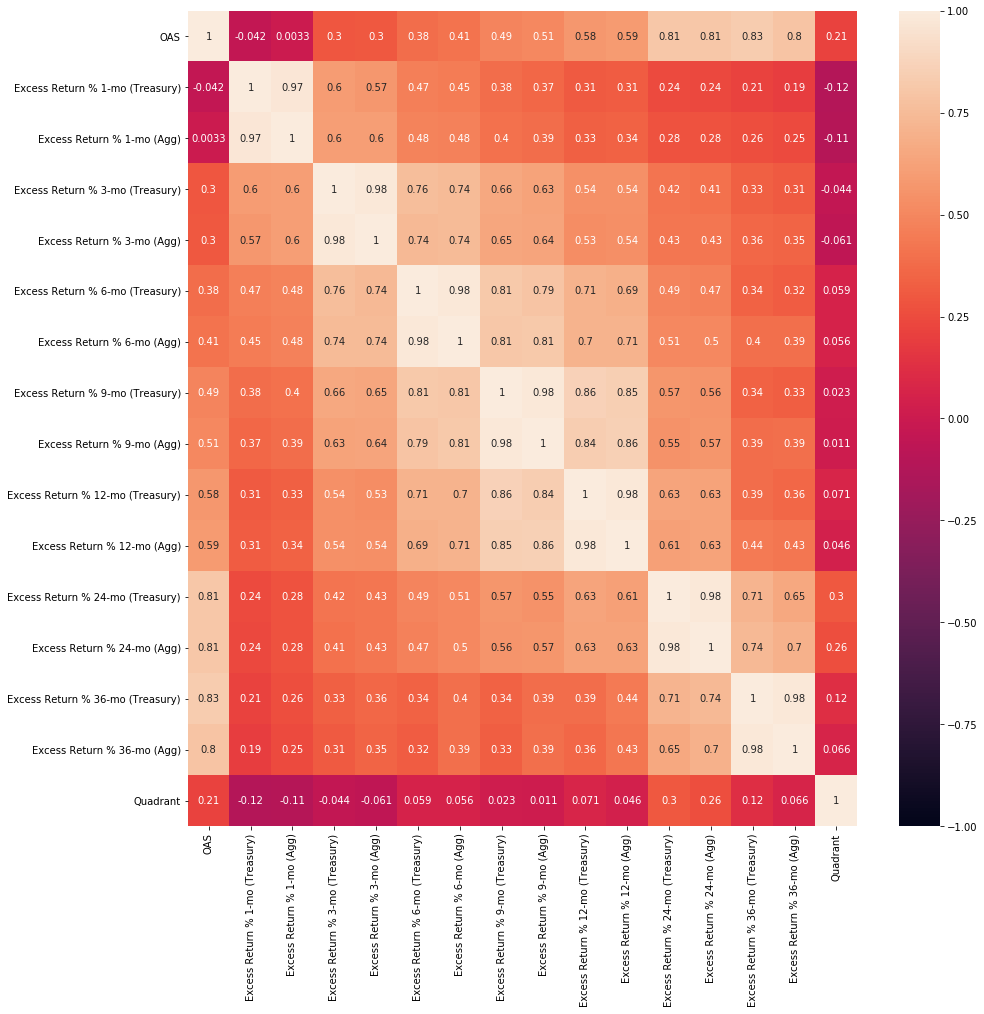

In [53]:
#Pairwise correlation between attributes
fig=plt.figure(figsize=(15, 15))
sns.heatmap(data3[['OAS', 'Excess Return % 1-mo (Treasury)', 'Excess Return % 1-mo (Agg)', 'Excess Return % 3-mo (Treasury)', 'Excess Return % 3-mo (Agg)', 'Excess Return % 6-mo (Treasury)', 'Excess Return % 6-mo (Agg)','Excess Return % 9-mo (Treasury)', 'Excess Return % 9-mo (Agg)', 'Excess Return % 12-mo (Treasury)', 'Excess Return % 12-mo (Agg)', 'Excess Return % 24-mo (Treasury)','Excess Return % 24-mo (Agg)','Excess Return % 36-mo (Treasury)','Excess Return % 36-mo (Agg)','Quadrant']].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

# Now that we see the picture, let us make some linear regression models.

## Relationship Between OAS & Excess Return % 1-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

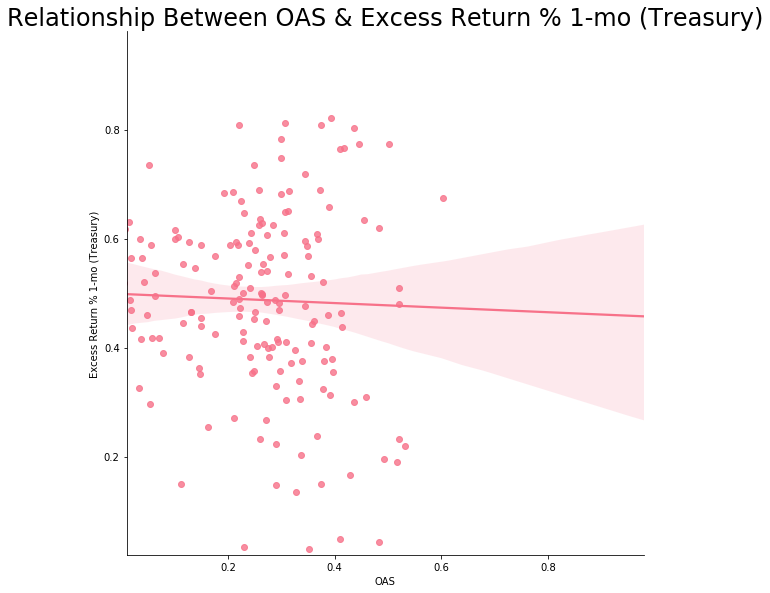

In [54]:
# For OAS Excess Return % 1-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 1-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

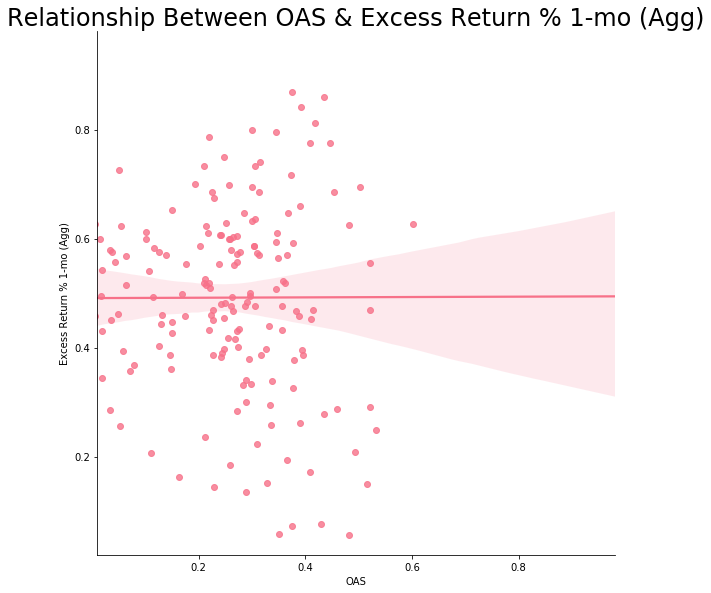

In [55]:
# For OAS Excess Return % 1-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 1-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 1-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

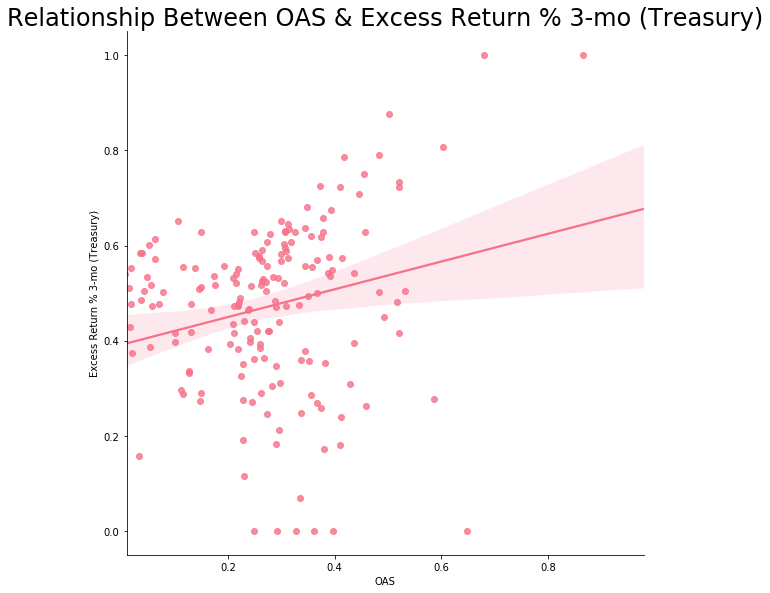

In [56]:
# For OAS Excess Return % 3-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Treasury)', size=24)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 3-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

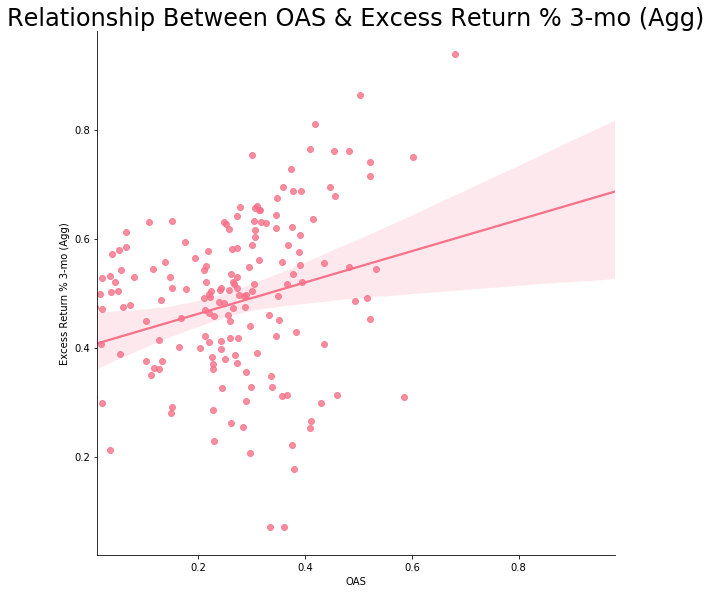

In [57]:
# For OAS Excess Return % 3-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 3-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 3-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

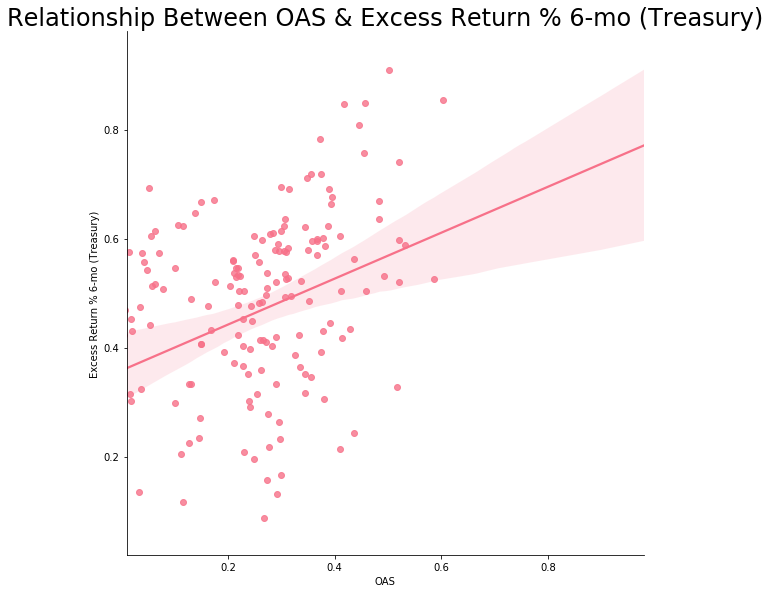

In [58]:
# For OAS Excess Return % 6-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 6-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

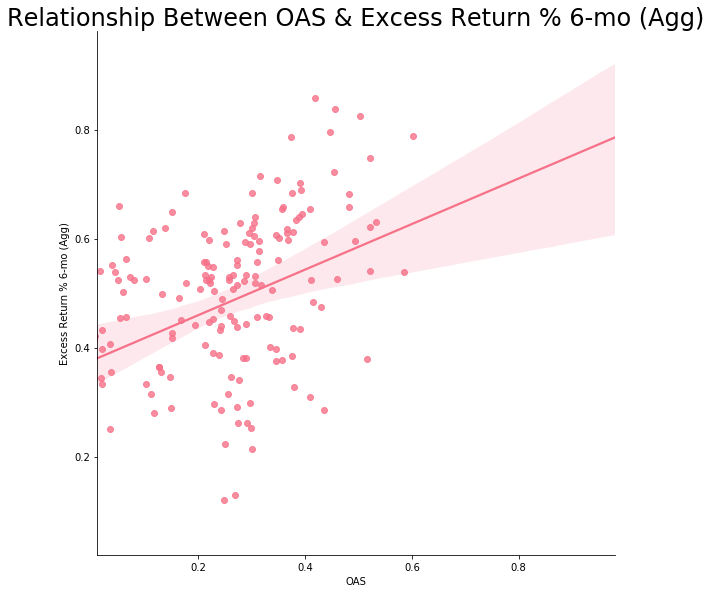

In [59]:
# For OAS Excess Return % 6-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 6-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 6-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

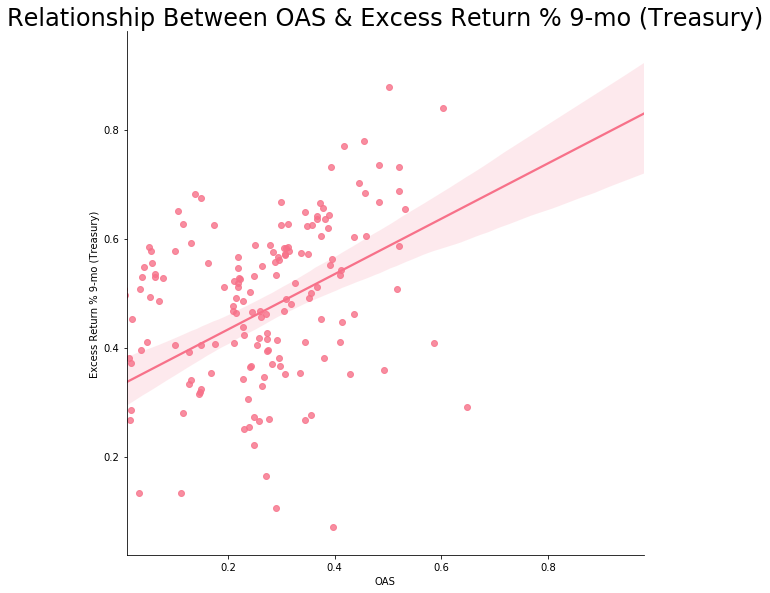

In [60]:
# For OAS Excess Return % 9-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 9-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

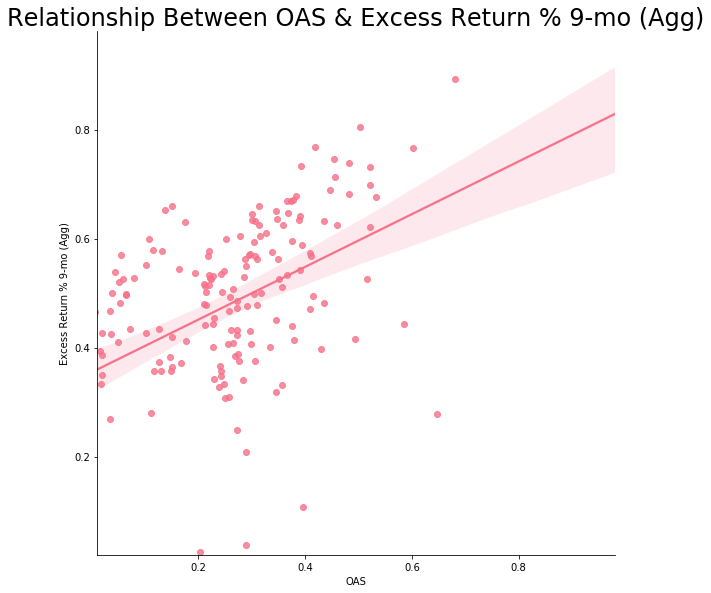

In [61]:
# For OAS Excess Return % 9-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 9-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 9-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

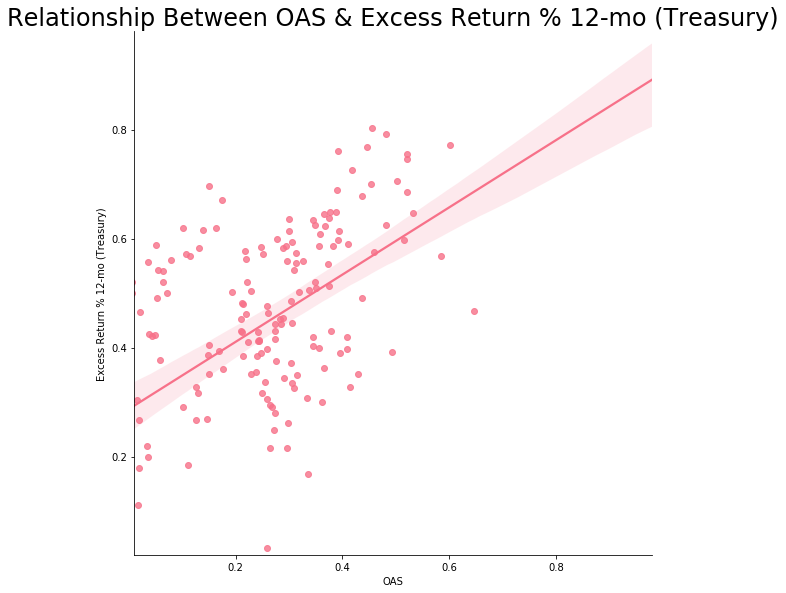

In [62]:
# For OAS Excess Return % 12-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 12-mo (Agg) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

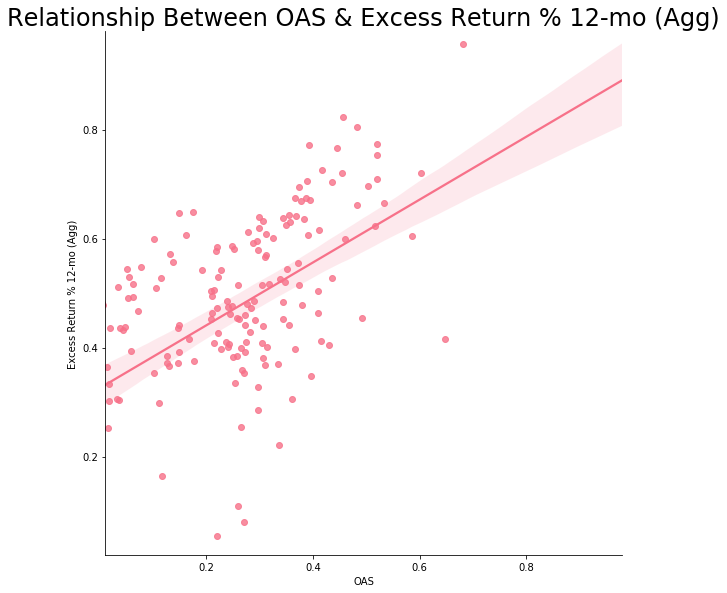

In [63]:
# For OAS Excess Return % 12-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 12-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 12-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Treasury) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

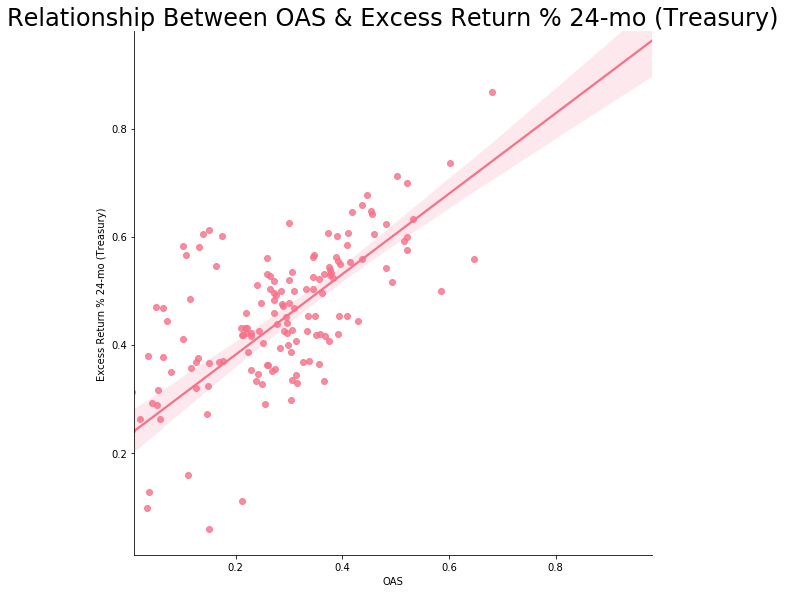

In [64]:
# For OAS Excess Return % 24-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.011)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 24-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

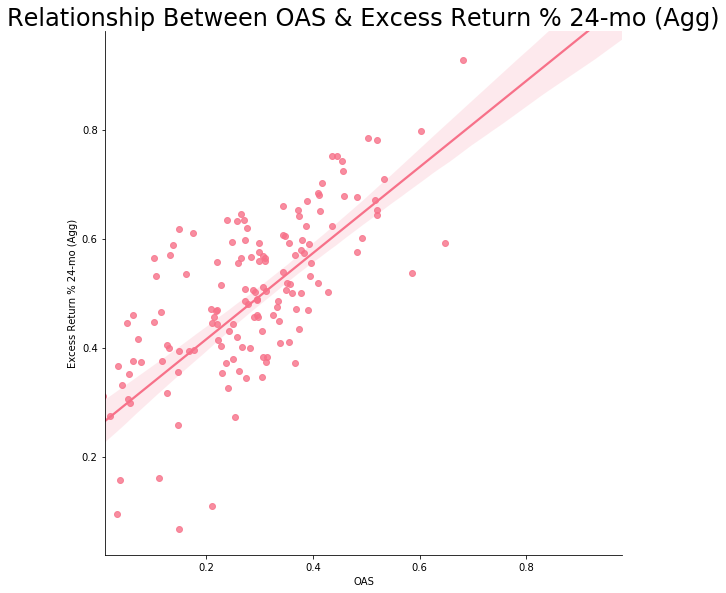

In [65]:
# For OAS Excess Return % 24-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 24-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 24-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Treasury) shown below.

(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

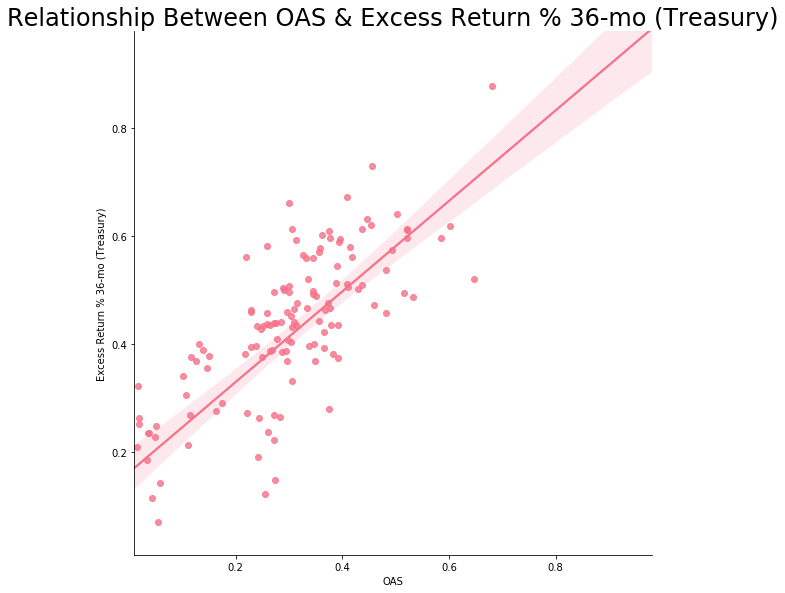

In [66]:
# For OAS Excess Return % 36-mo (Treasury)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Treasury)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Treasury)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.009)
plt.xlim(right=.98)
plt.xlim(left=.01)

## Relationship Between OAS & Excess Return % 36-mo (Agg) shown below.


(0.01, 0.98)

<Figure size 1080x3240 with 0 Axes>

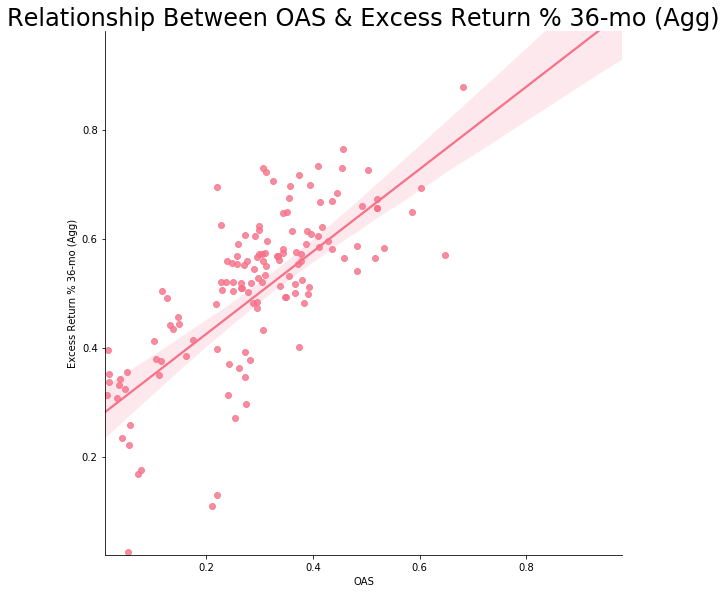

In [67]:
# For OAS Excess Return % 36-mo (Agg)
fig=plt.figure(figsize=(15, 45)) # Manager 
sns.lmplot('OAS','Excess Return % 36-mo (Agg)', data = data3, height=8, fit_reg=True)
plt.title('Relationship Between OAS & Excess Return % 36-mo (Agg)', size=24)
plt.ylim(top=0.98)
plt.ylim(bottom=.02)
plt.xlim(right=.98)
plt.xlim(left=.01)